## Financial Analytics 
### Name: Kshitij Chilate
### Date: 01/01/2026


Where:


*   $y_t$ --> the value of the variable (e.g., stock price ) at time $t$
*   $t$ -> the time index (e.g., days, months, years)
*   $T$ -> the total number of observations

**Explaination:**
This notation means we have a sequence:

$$
y_1, y_2, y_3, \dots, y_T
$$

For example, if you record the **closing price** of a stock every day for 10 days, you get:

$$
\{ y_ \}_{t=1}^{10} = \{ 105, 108, 110, 107, 115,...\}
$$

---

## **Why Forecast Time Series?**

Time series forecasting uses **historical patterns** to **predict future values**. In finance, acurate forecasts are critical.

**Application:**


*   **Investment decisions:** Predicate stock prices or market returns
*   **Risk management:** Estimating potential losses and volatility
*   **Budgeting & Planning:** Predicting expences or revenues


**Plain English Example:**
If Apple's stock price has **steadily risen** for the last 3 months, we can **model its pattern** and estimate where the price might be next week.

---

## **What is Stationarity?**

A **stationary time series** has **constant** statistical properties - **mean**, **varience**, and **autocorrelation**- over time.

## **ADF Test (Agumented Dickey-Fuller Test)**

The **ADF test** determines whether a series is **stationary**.

**Hypotheses:**

*   $H_0$: The series is **non-stationary**
*   $H_1$: The series is **stationary**

**Decision Rule:**


*   If **p-value < 0.05** -> Reject $H_0$ -> Series is **Stationary**









In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
import math

In [ ]:
data = pd.read_csv('synthetic_stock_data.csv',parse_dates= ["Date"], index_col="Date")
print(data.head())

                 Close
Date                  
2020-01-01  100.496714
2020-01-02  100.358450
2020-01-03  101.006138
2020-01-06  102.529168
2020-01-07  102.295015


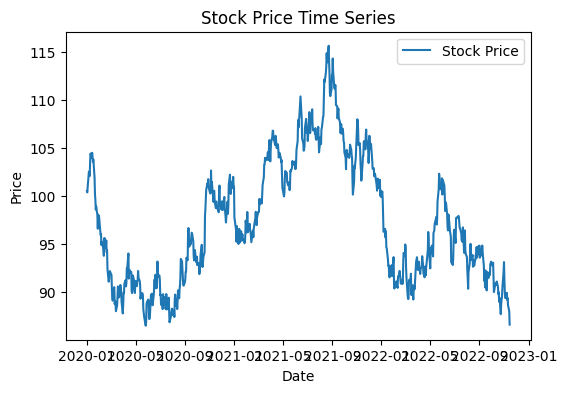

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(data["Close"], label="Stock Price")
plt.title("Stock Price Time Series")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [ ]:
# STEP 3: Stationary Check (ADF Test)

def adf_test(series,title=''):
  print(f"---ADF Test:{title}---")
  result=adfuller(series.dropna(),autolag='AIC')
  labels=['ADF Test Statistic','p-value','#Lags Used','# Observations']
  out=pd.Series(data=result[0:4],index=labels)
  for key,val in result[4].items():
    out[f"Critical Value ({key})"]=val
  print(out)
  if result[1]<=0.05:
    print("Stationary: Reject Null Hypothesis")
  else:
    print("Not Stationary: Fail to Reject Null Hypothesis")
  print()


adf_test(data["Close"],"Stock Prices")

---ADF Test:Stock Prices---
ADF Test Statistic       -1.787587
p-value                   0.386641
#Lags Used                0.000000
# Observations          749.000000
Critical Value (1%)      -3.439111
Critical Value (5%)      -2.865407
Critical Value (10%)     -2.568829
dtype: float64
Not Stationary: Fail to Reject Null Hypothesis



---ADF Test:Differenced Stock Prices---
ADF Test Statistic      -27.892575
p-value                   0.000000
#Lags Used                0.000000
# Observations          748.000000
Critical Value (1%)      -3.439123
Critical Value (5%)      -2.865412
Critical Value (10%)     -2.568832
dtype: float64
Stationary: Reject Null Hypothesis



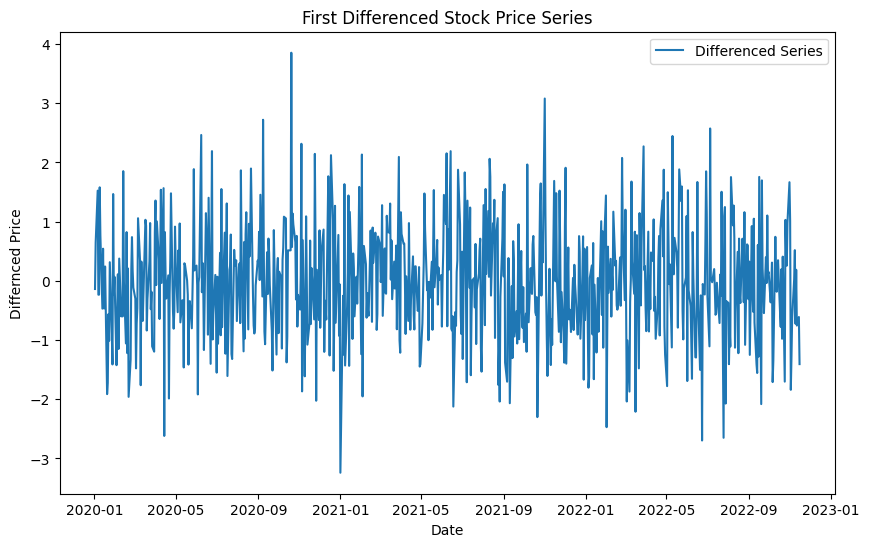

In [ ]:
#STEP 4: Differencing if Needed

data["Close_diff"]=data["Close"].diff()
adf_test(data["Close_diff"].dropna(),"Differenced Stock Prices")

plt.figure(figsize=(10, 6))
plt.plot(data['Close_diff'],label="Differenced Series")
plt.title('First Differenced Stock Price Series')
plt.xlabel('Date')
plt.ylabel('Differnced Price')
plt.legend()
plt.show()

In [ ]:
# STEP 5 : Train Test Split

train_size=int(len(data)*0.8)
train=data.iloc[:train_size]["Close"]
test=data.iloc[train_size:]["Close"]

print(f"Train Size: {len(train)}")
print(f"Test Size: {len(test)}")

Train Size: 600
Test Size: 150


In [ ]:
# STEP 6: Fit ARIMA Model
#---------------------------------
# For simplicity, we manually choose p=2, q=2 (can also do grid search)

Model=sm.tsa.arima.ARIMA(train,order=(2,1,2))
Model_fit=Model.fit()
print(Model_fit.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  600
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -827.046
Date:                Tue, 02 Sep 2025   AIC                           1664.093
Time:                        11:19:18   BIC                           1686.069
Sample:                    01-01-2020   HQIC                          1672.648
                         - 04-19-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9388      0.009   -108.269      0.000      -0.956      -0.922
ar.L2         -0.9960      0.009   -112.615      0.000      -1.013      -0.979
ma.L1          0.9231      0.022     42.598      0.0

In [ ]:
# STEP 7: Forecasting

forecast = Model_fit.forecast(steps=len(test))

forecast_df = pd.DataFrame({'Actual': test, 'Forecast': forecast}, index= test.index)

# STEP 8: Evaluation (RMSE)
rmse = math.sqrt(mean_squared_error(test, forecast))
print(f"RMSE on Test Set: {rmse:.4f}")


RMSE on Test Set: 3.9883


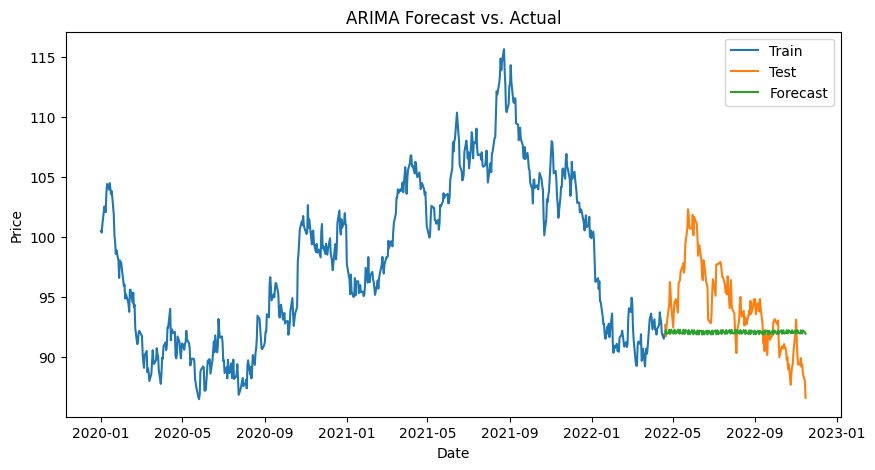

In [ ]:
# STEP 9: Visualization
#--------------------------------

plt.figure(figsize=(10, 5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast')
plt.title('ARIMA Forecast vs. Actual')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()